### Assignment 3: Graph Visualization

#### Summer 2021
**Authors:** GOAT Team (Estaban Aramayo, Ethan Haley, Claire Meyer, and Tyler Frankenburg) 

This assignment looks at a CSV of Donor + Donor Recipient Data from OpenSecret, which tracks political donations.

This particular dataset tracks the donation total during the 2020 election cycle from individuals, companies, and PACs/Super PACs to the 148 members of congress who objected to certification of 2020 Electoral College results in January 2021.

This data is available [here](https://docs.google.com/spreadsheets/d/1PPjz-U1LueQYHaVCU8iCYf3O4lc-OYN7uOf3OknhYxo/edit#gid=1325242852). 


In [1]:
import networkx as nx
import pandas
import matplotlib.pyplot as plt


First we import the CSV and do a couple quick checks to see the shape and form of the data. 

In [2]:
df = pandas.read_csv('donor_members.csv')
df.head()

PAC        CID           CRPName Distid    Total  \
0  American Medical Assn  N00025219  Burgess, Michael   TX26  $20,000   
1  American Medical Assn  N00028152   McCarthy, Kevin   CA23  $20,000   
2   American Dental Assn  N00005736      Babin, Brian   TX36  $20,000   
3   American Dental Assn  N00025219  Burgess, Michael   TX26  $20,000   
4   American Dental Assn  N00035346     Carter, Buddy   GA01  $17,500   

   Unnamed: 5                                         Unnamed: 6  
0         NaN                                                NaN  
1         NaN  Direct contributions data covers the 2020 elec...  
2         NaN                                                NaN  
3         NaN                                                NaN  
4         NaN                                                NaN

In [3]:
df.shape

(2686, 7)

Then, we use the `from_pandas_dataframe` function to create a networkx graph from the dataframe. [Source](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.convert_matrix.from_pandas_dataframe.html). 

In [4]:
test_graph = nx.from_pandas_dataframe(df, source="PAC", target="CRPName",
                                  edge_attr=["Total"])

In [5]:
print(nx.info(test_graph))

Name: 
Type: Graph
Number of nodes: 712
Number of edges: 2675
Average degree:   7.5140


For this assignment we want to explore diameter. However, diameter requires a connected graph. First, let's check if this graph is, with the `is_connected` function. [Source](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.components.is_connected.html#networkx.algorithms.components.is_connected).

In [6]:
print(nx.is_connected(test_graph))

False


This graph is not connected. We can look for subgraphs that are however, and focus measurement there. The `connected_component_subgraphs` function generates any available connected subgraphs. [Source](https://networkx.org/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.components.connected.connected_component_subgraphs.html).

In [7]:
graphs = list(nx.connected_component_subgraphs(test_graph))
print("There are ", len(graphs), " connected subgraphs in this graph.")

There are  2  connected subgraphs in this graph.


Let's compare the size of these subgraphs by the number of nodes.

In [8]:
print("The first subgraph has ",len(graphs[0].nodes())," nodes.")
print("The second subgraph has ",len(graphs[1].nodes())," nodes.")

The first subgraph has  710  nodes.
The second subgraph has  2  nodes.


Let's select the larger of the two, and explore further.



In [9]:
subgraph_test = graphs[0]

colors = []
for node in subgraph_test:
    if node in df["CRPName"].values:
        colors.append("violet")
    else: colors.append("lightgreen")
        
#node colors `for` loop source: https://stackoverflow.com/a/59473049

C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\tsfra\py_oh_my\anaconda3\envs\sps620env\lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):


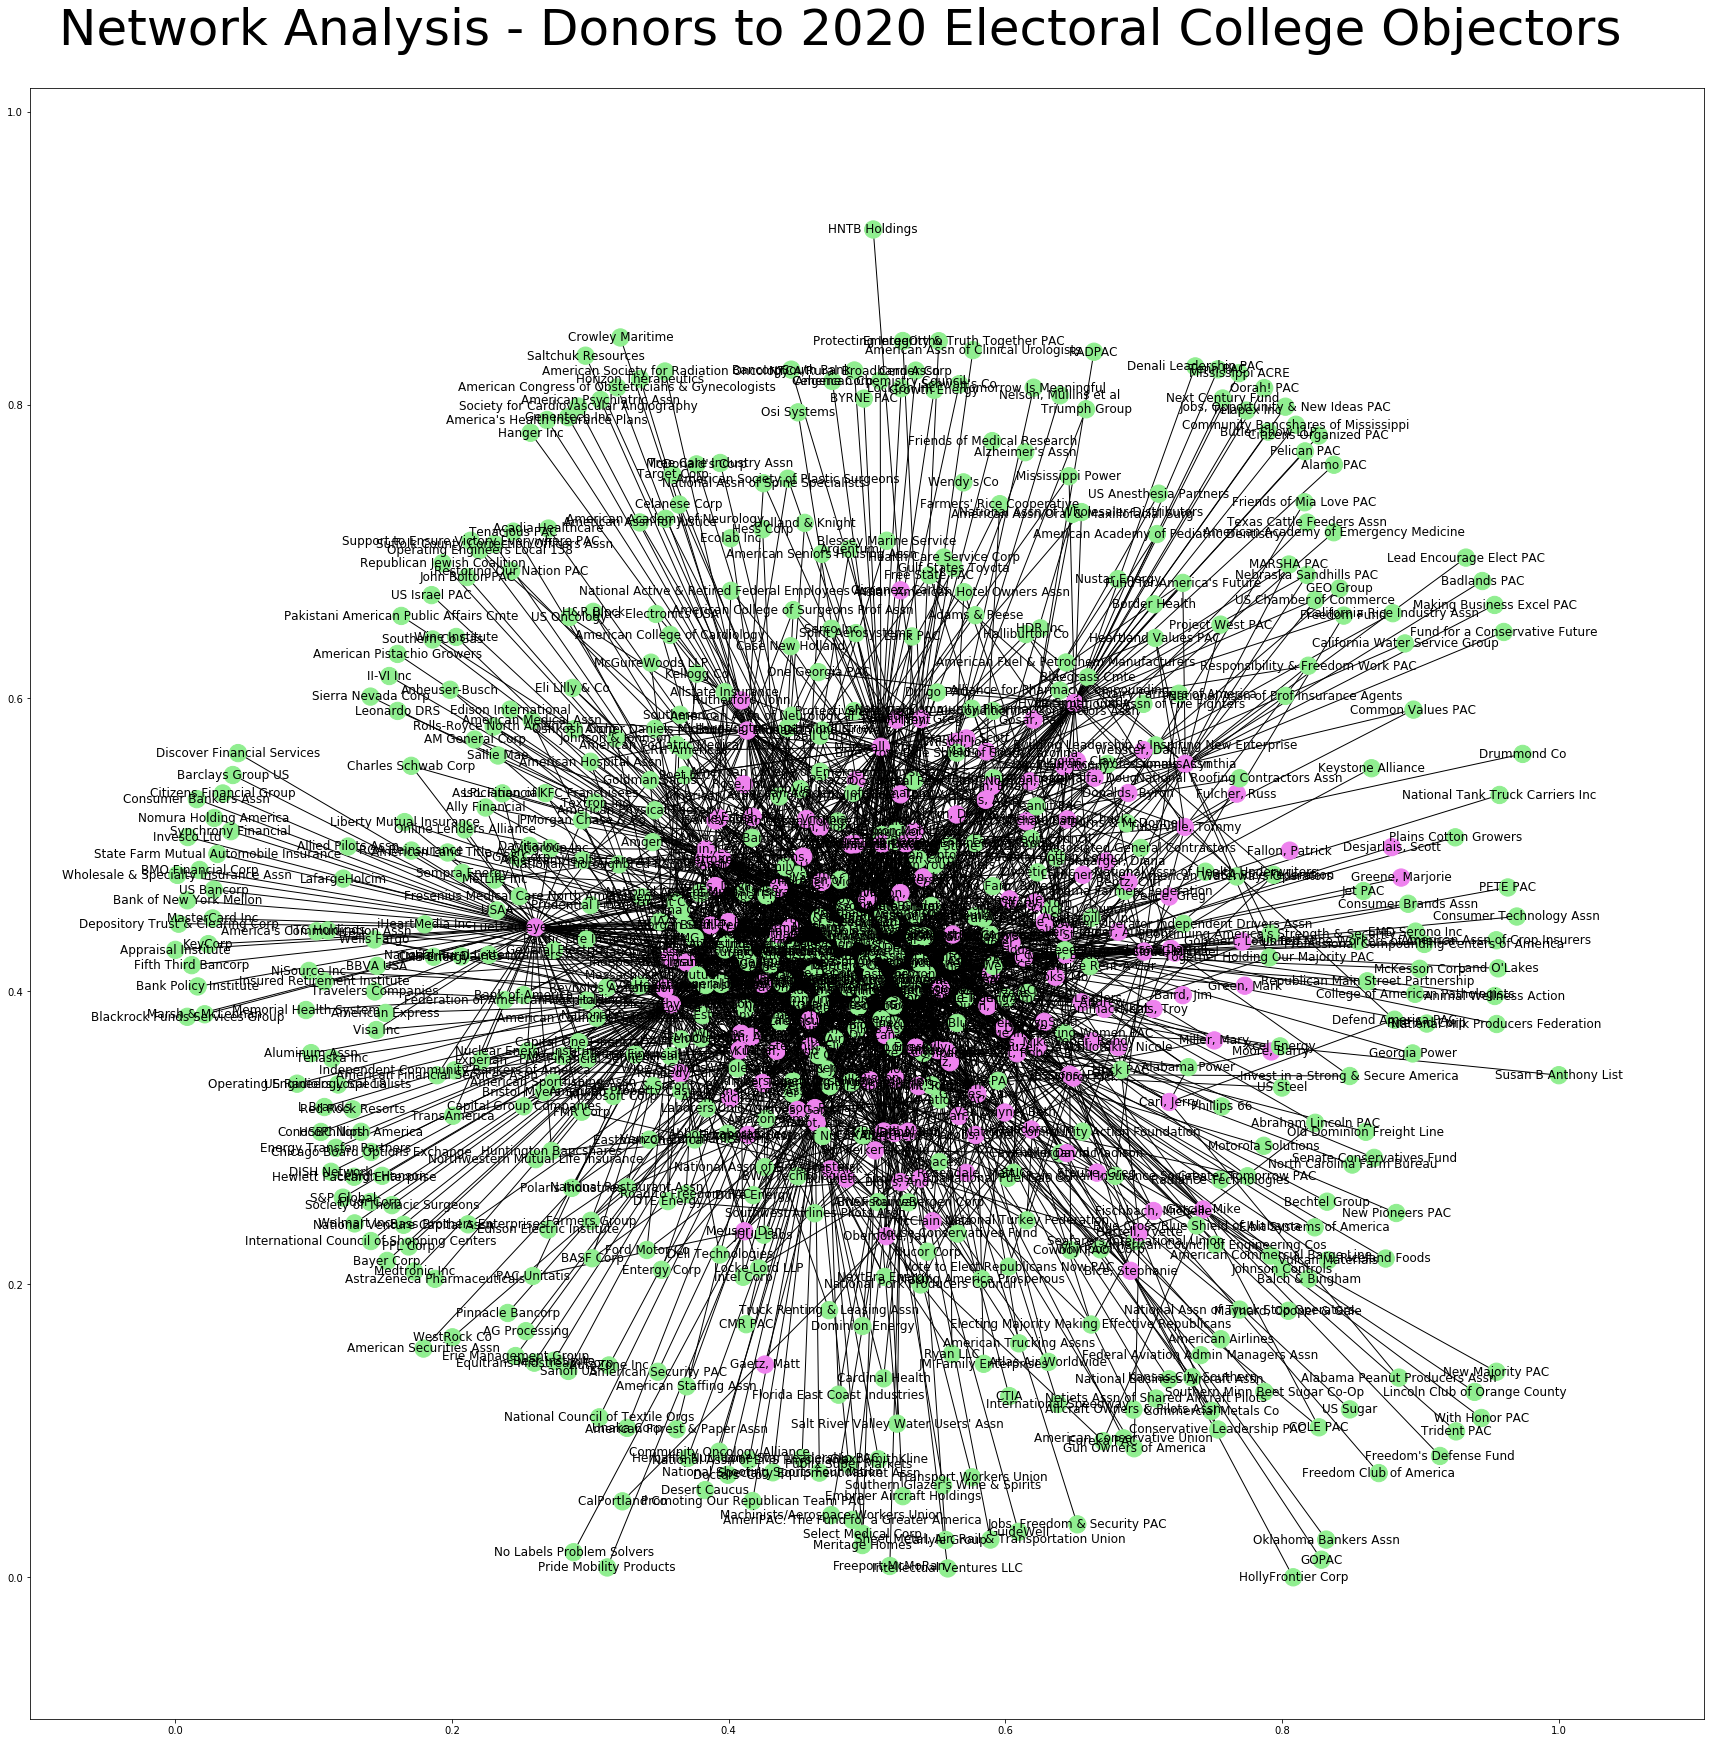

In [10]:
plt.figure(figsize = (30, 30))
ax = plt.subplot()

nx.draw_networkx(subgraph_test, ax=ax, node_color=colors)

plt.figtext(.5,.9,'Network Analysis - Donors to 2020 Electoral College Objectors', fontsize=50, ha='center')
plt.show()

We can use the built in diameter function to determine the diameter of this subgraph.

In [21]:
diameter_test = nx.diameter(subgraph_test)

In [22]:
print("The diameter is: ", diameter_test)

The diameter is:  6


We can also look at top nodes based on some of our centrality measures, e.g. degree centrality, closeness, and betweenness. We start by pulling the sorted_map function from [the textbook's repo](https://www.oreilly.com/library/view/social-network-analysis/9781449311377/), then using different NetworkX built in centrality functions. 

In [23]:
def sorted_map(dd: dict) -> dict:
    """
    Sorts dict by its values (desc)
    
    :param dd: dictionary with numeric values
    :return sorted dictionary ordered by its numeric value
    """
    sorted_dict = sorted(dd.items(), key=lambda x: (-x[1], x[0]))
    return sorted_dict

In [24]:
d = nx.degree_centrality(subgraph_test)
ds = sorted_map(d)
ds[:10]

[('McCarthy, Kevin', 0.22284908321579688),
 ('Majority Cmte PAC', 0.1706629055007052),
 ('Scalise, Steve', 0.1466854724964739),
 ('Luetkemeyer, Blaine', 0.12552891396332863),
 ('Hudson, Richard', 0.10155148095909731),
 ('American Bankers Assn', 0.09449929478138222),
 ('Stefanik, Elise', 0.09449929478138222),
 ('Marshall, Roger', 0.09026798307475317),
 ('Graves, Sam', 0.08603667136812412),
 ('National Auto Dealers Assn', 0.0846262341325811)]

In [25]:
c = nx.closeness_centrality(subgraph_test)
cs = sorted_map(c)
cs[:10]

[('Majority Cmte PAC', 0.47583892617449663),
 ('American Bankers Assn', 0.4425717852684145),
 ('National Auto Dealers Assn', 0.43443627450980393),
 ('McCarthy, Kevin', 0.4180424528301887),
 ('American Crystal Sugar', 0.4141355140186916),
 ('National Assn of Realtors', 0.4122093023255814),
 ('Comcast Corp', 0.4065366972477064),
 ('AT&T Inc', 0.40101809954751133),
 ('Koch Industries', 0.3978675645342312),
 ('Scalise, Steve', 0.39214601769911506)]

In [26]:
b = nx.betweenness_centrality(subgraph_test)
bs = sorted_map(b)
bs[:10]

[('Majority Cmte PAC', 0.1728287711734535),
 ('McCarthy, Kevin', 0.16931791360004367),
 ('Luetkemeyer, Blaine', 0.09260890526740513),
 ('Scalise, Steve', 0.07678017910891102),
 ('Hyde-Smith, Cindy', 0.06477478319404828),
 ('American Bankers Assn', 0.05942045912816601),
 ('Hudson, Richard', 0.053983861783238),
 ('Marshall, Roger', 0.05367059974479937),
 ('National Auto Dealers Assn', 0.052432692383760734),
 ('Graves, Sam', 0.051492943847402786)]

There are some consistent names across all 3.  Who are the 'elite group' across the 3 centrality metrics?

While the distribution of closeness across this group falls within a very narrow range; the representatives and donors here are very similar in their closeness centrality measure.   

Regarding degree centrality and betweenness, t is not particularly surprising given the nature of his job as the leader of his caucus that House Majority Leader Kevin McCarthy ranks either 1 or 2 in each category.  He shares the top two spots with Majority Cmte PAC, a so-called leadership PAC with which he is directly affiliated, which raises money for the campaigns of other Republican House members.

In [29]:
names1 = [x[0] for x in ds[:10]]
names2 = [x[0] for x in cs[:10]]
names3 = [x[0] for x in bs[:10]]
names = list(set(names1) | set(names2) | set(names3))

summary_df = pandas.DataFrame({'Name': [[name] for name in names], 
    'Degree Centrality': [d[name] for name in names],
    'Closeness': [c[name] for name in names], 
    'Betweenness': [b[name] for name in names]})

summary_df

Name  Degree Centrality  Closeness  Betweenness
0   [National Auto Dealers Assn]           0.084626   0.434436     0.052433
1       [American Crystal Sugar]           0.064880   0.414136     0.038361
2                     [AT&T Inc]           0.053597   0.401018     0.024763
3               [Scalise, Steve]           0.146685   0.392146     0.076780
4              [Stefanik, Elise]           0.094499   0.382416     0.038772
5              [Hudson, Richard]           0.101551   0.383243     0.053984
6              [McCarthy, Kevin]           0.222849   0.418042     0.169318
7    [National Assn of Realtors]           0.078984   0.412209     0.041354
8                  [Graves, Sam]           0.086037   0.379550     0.051493
9          [Luetkemeyer, Blaine]           0.125529   0.391280     0.092609
10       [American Bankers Assn]           0.094499   0.442572     0.059420
11           [Majority Cmte PAC]           0.170663   0.475839     0.172829
12             [Marshall, Roger]           0.090268   0.372766     0.053671
13             [Koch Industries]           0.071932   0.397868     0.036360
14           [Hyde-Smith, Cindy]           0.080395   0.373551     0.064775
15                [Comcast Corp]           0.069111   0.406537     0.033881

In [17]:
nx.__version__

'1.11'

In [18]:
nx.write_graphml(subgraph_test, "subgraph_test.graphml")

In [19]:
from IPython.display import IFrame

In [20]:
IFrame('https://ebhtra.github.io/gory-graph/network/', width=1000, height=1000)